In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
import seaborn as sns
from msbl import *

# Forces and potentials

In [234]:
#double well potential
def potential_double_well(x,delta_u,L):
    """"double well potential"""
    return delta_u*(-1 + (x/L)**2)**2

def force_double_well(x,delta_u, L):
    "double well drift force"
    return 4*delta_u*x/(L**2) - (4*delta_u*x**3)/L**4

#double well potential 2D, example 3

def drift3_x(x,y):
    """"double well potential"""
    return -(2*(x**2 - 1)*2*x)

def drift3_y(x,y):
    """"double well potential"""
    return -2*y

def diff3_x(x,y):
    """"double well potential"""
    return 2 

def diff3_y(x,y):
    """"double well potential"""
    return 2 

def pot_3(x,y):
    return (x**2 - 1)**2 +y**2

#harmonic potential 2d
def drift2_x(x,y, k0, k1):
    """"double well potential"""
    return -k0*x + k1*y

def drift2_y(x,y,k0, k1):
    """"double well potential"""
    return -k0*y - k1*x

def diff2_x(x,y):
    """"double well potential"""
    return 2

def diff2_y(x,y):
    """"double well potential"""
    return 2

#lorentz

def drift_x_3d(x, y, z):
    return -10*x + 10*y

def drift_y_3d(x, y, z):
    return 28*x -x*z - y

def drift_z_3d(x, y, z):
    return x*y -8/3*z


# Trayectories

In [229]:
def trayectories(pos_init, time_step, noise, iterations, sets, example, L = 4, delta_u = 5, k = 3, gamma = 1, T=1, kb=1):
###create trayectories using a predefined drift and diffussion
    positions =[pos_init]
    time = 0
    time_list = [time]
    for j in range (0, sets,1):
        pos = pos_init  
        for i in range (1,iterations,1):
            if example == "double_well":
                update =  ((4*delta_u*pos/(L**2) - (4*delta_u*pos**3)/L**4))*time_step + np.sqrt(2*kb*T/gamma)*noise[i]
            if example == "harmonic_oscillator":
                update = ((-k/gamma)*pos)*time_step + np.sqrt(2*kb*T/gamma)*noise[i]
            pos = pos + update
            time = time + time_step
            positions.append(pos)
            time_list.append(time)
    
    return np.asarray(positions), np.asarray(time_list)


"""function for constructing trayectories with the obtained equations"""

def trayectories_2d(pos_init, time_step, noise, iterations, type, a1 = 3, a2 = 6 ):
    pos_x = pos_init[0]
    pos_y = pos_init[1]
    positions_x = [pos_x]
    positions_y = [pos_y]
    time = 0
    time_list = [time]
    noise_x = noise[0]
    noise_y = noise[1]

    for i in range(1, iterations):
        if type == "example_1":
            update_x = drift_x(pos_x, pos_y)*time_step + np.sqrt(diff_x(pos_x, pos_y))*noise_x[i]
            update_y = drift_y(pos_x, pos_y)*time_step + np.sqrt(diff_y(pos_x, pos_y))*noise_y[i]
        if type == "example_2":
            update_x = drift2_x(pos_x, pos_y, a1, a2)*time_step + np.sqrt(diff2_x(pos_x, pos_y))*noise_x[i]
            update_y = drift2_y(pos_x, pos_y, a1, a2)*time_step + np.sqrt(diff2_y(pos_x, pos_y))*noise_y[i]
        if type == "example_3":
            update_x = drift3_x(pos_x, pos_y)*time_step + np.sqrt(diff3_x(pos_x, pos_y))*noise_x[i]
            update_y = drift3_y(pos_x, pos_y)*time_step + np.sqrt(diff3_y(pos_x, pos_y))*noise_y[i]

        pos_x = pos_x + update_x
        pos_y = pos_y + update_y
        time = time + time_step
        positions_x.append(pos_x)
        positions_y.append(pos_y)
        time_list.append(time)
    
    return np.asarray(positions_x), np.asarray(positions_y), np.asarray(time_list)

def trayectories_3d(pos_init, time_step, noise, iterations, type):
    pos_x = pos_init[0]
    pos_y = pos_init[1]
    pos_z = pos_init[2]
    positions_x = [pos_x]
    positions_y = [pos_y]
    positions_z = [pos_z]
    time = 0
    time_list = [time]
    noise_x = noise[0]
    noise_y = noise[1]
    noise_z = noise[2]

    for i in range(1, iterations):
        if type == "lorentz":
            update_x = drift_x_3d(pos_x, pos_y, pos_z)*time_step #+ np.sqrt(diff_x_3d(pos_x, pos_y, pos_z))*noise_x[i]
            update_y = drift_y_3d(pos_x, pos_y, pos_z)*time_step #+ np.sqrt(diff_y_3d(pos_x, pos_y, pos_z))*noise_y[i]
            update_z = drift_z_3d(pos_x, pos_y, pos_z)*time_step #+ np.sqrt(diff_y_3d(pos_x, pos_y, pos_z))*noise_y[i]


        pos_x = pos_x + update_x
        pos_y = pos_y + update_y
        pos_z = pos_z + update_z
        time = time + time_step
        positions_x.append(pos_x)
        positions_y.append(pos_y)
        positions_z.append(pos_z)
        time_list.append(time)
    
    return np.asarray(positions_x), np.asarray(positions_y), np.asarray(positions_z),  np.asarray(time_list)

# Libraries

In [230]:
#Generate a library for computing drift and difussion term ( 1, x, x**2, x**3x, ...)
def library(results, length):
    library = np.ones((1,len(results)))
    for i in range (1, length):
        library_column = results**i
        library_column = library_column.reshape(1, len(results))
        library = np.concatenate((library, library_column), axis = 0)
       
    return library

def library2d(results_x,results_y, length):
    library = np.ones((1,len(results_x)))
    index_i =[]
    index_j =[]
    for i in range (0, length):
        for j in range(0,length):
            library_column = (results_x**i)*(results_y**j)
            library_column = library_column.reshape(1, len(results_x))
            library = np.concatenate((library, library_column), axis = 0)
            index_i.append(i)
            index_j.append(j)
    
    index = np.asarray(index_i), np.asarray(index_j)
    return library[1:], index

def library3d(results_x,results_y, results_z, length):
    library = np.ones((1,len(results_x)))
    index_i =[]
    index_j =[]
    index_k =[]
    for i in range (0, length):
        for j in range(0,length):
            for k in range(0,length):
                library_column = (results_x**i)*(results_y**j)*(results_z**k)
                library_column = library_column.reshape(1, len(results_x))
                library = np.concatenate((library, library_column), axis = 0)
                index_i.append(i)
                index_j.append(j)
                index_k.append(k)
    
    index = np.asarray(index_i), np.asarray(index_j), np.asarray(index_k)
    return library[1:], index

#Compute expectation value for the drift
def output_vectors_dr(lib, dt):
    output = np.diff(lib)/dt
    return(np.asarray(output))



def plotting_results(pos, array):
    cont = -1
    x= pos
    val= np.zeros((len(x), len(array)))

    for i in range (0, len(array)):
        cont = cont +1
        if array[i]!= 0:
            for k in range(0, len(x)):
                val[k,i] = array[i]*x[k]**cont
    
    return(val)

""""create libraries"""

#Compute expectation value for the diffusion
def output_vectors_di(lib, dt, phi, dri):
    output = np.diff(lib)
    output = np.asarray(output)
    output = output.reshape(len(output))
    output = ((output- np.dot(phi,dri)*dt)**2)/dt
    return(output)

# Backbone

In [231]:
def msbl_pythonic(PHI, Y, max_iters):

    #default control parameters
    prune_gama = 1*10**-4 
    epsilon_val = 1*10**-8
    lambda_0 = 1
    Learn_Lambda = 1


    N, M = PHI.shape
    N, L = Y.shape

#generate initial values

    gamma = 0.5*np.ones(M) #generate values of gamma for each conlumn of the library (10)
    keep_list = np.arange(0,M) #create indexes for each column of the library
    m = len(keep_list) #count number of elements in keep_list
    mu = np.zeros((M, L))
    count = 0
    index=[]

    for i in range (0, max_iters):
        if min(gamma) < prune_gama:
            for j in range (0, len(gamma)):
                if gamma[j] > prune_gama:  #take indexes of elements less than 
                    index.append(j)
            gamma = gamma[index]
            PHI = PHI[:, index] #extract related lib elements
            keep_list = keep_list[index] #store indexes 
            m = len(gamma) #compute number of indexes taken
            index=[]

        if count == 1: 
            gamm = gamma
    
        mu_old = mu
        Gamma = np.diag(gamma) #create identity matrix with diagonal equal to gamma elements
        G = np.diag(np.sqrt(gamma))

    

        U, S, V = np.linalg.svd(np.dot(PHI,G), full_matrices = False)


    
        U = U.transpose()
        di = len(S)

        if di > 1:
            diag_S = S
            aa= np.diag(diag_S/(diag_S**2 + lambda_0 + 1e-16 ))

    
        else:
            diag_S = S[0]
            aa= diag_S/(diag_S**2 + lambda_0 + 1e-16 )

   

        Xi = np.dot(np.dot(np.dot(G,np.transpose(V)), aa ), U)
        mu = np.dot(Xi,Y)
    

        #update hyperparameters
        gamma_old = gamma
        mu2_bar = (abs(mu)**2)/L
        mu2_bar = mu2_bar.reshape(1, len(mu2_bar))


        multi = sum(np.multiply(np.transpose(Xi), np.dot(PHI, Gamma)))
    
        Sigma_w_diag = np.real(gamma - multi)
        gamma = Sigma_w_diag + mu2_bar
        gamma = gamma.reshape(len(gamma[0]))

        if Learn_Lambda == 1:
            den = N-m + np.sum(Sigma_w_diag/gamma_old)

            lambda_0 = (np.linalg.norm(Y-np.dot(PHI,mu), ord = "fro")**2/L)/den

        count = count +1

    mu = mu.reshape(len(mu))
    mu_final = np.zeros(M)
    mu_final[keep_list] = mu
    
    return mu_final
    


In [19]:
#Create function that performs calculation for different values of k

def msbl_generator(n_samples, k_values):
    #Set initial conditions
    number_samples = 25000                                   #total number of iterations
    time_step = 0.04                                         #time step for euler differentation
    x_stable = 0                                             #initial position
    k_init = 3                                               #distance from the center to the minimum
    gamma = 1                                                #frition coefficient

    gaussian_noise = np.random.normal(size = number_samples)*np.sqrt(time_step)
    real_k = []
    estimated_k =[]
    real_D = []
    estimated_D =[]

    for kval in k_values:
        trayectories_ha, time_values_ha = trayectories(x_stable, time_step, gaussian_noise, number_samples, 1, "harmonic_oscillator", k=kval, gamma = gamma)
        
        lib_ha = library(trayectories_ha[:-1], 5)                    #Use polynomials up to order 20th for library
        lib_ha = lib_ha.T
        Edr_ha = output_vectors_dr(trayectories_ha, time_step)          #Compute expectation value
        Edr_ha = Edr_ha.reshape(len(Edr_ha), 1) 
        
        #Compute drift and reject values below the threshold
        sol_dr_ha =  msbl_pythonic(lib_ha, Edr_ha, 700)
        threshold = 0.05                                                      
        sol_dr_ha[abs(sol_dr_ha) < threshold] =0

        #Compute difussion using drift and reject values below the threshold
        Edi_ha = output_vectors_di(trayectories_ha, time_step, lib_ha, sol_dr_ha)
        Edi_ha= Edi_ha.reshape(len(Edi_ha),1)
        sol_di_ha=  msbl_pythonic(lib_ha, Edi_ha, 700)
        sol_di_ha[abs(sol_di_ha) < threshold] = 0

        real_k.append(kval)
        estimated_k.append(sol_dr_ha[1])
        real_D.append(2)
        estimated_D.append(sol_di_ha[0])

    return (real_k, estimated_k, real_D, estimated_D)



# Others

In [232]:
def porcentage_error(real, obtained):
    return abs(((real-obtained)/obtained)*100)

# 1) Double Well Potential

In [4]:
np.random.seed(1234)

#Set initial conditions
number_samples = 5000                               #total number of iterations
time_step = 0.2                                     #time step for euler differentation
L_stable = 0                                         #initial position
L =  5                                             #distance from the center to the minimum
H = 4                                               #height of the maximum
C1 = 4*H/(L**2)                                      #First coefficient of drift
C2 = -4*H/(L**4)                                     #Second coefficient diffusion

#Compute gaussian noise, time interval and trayectories
gaussian_noise = np.random.normal(size = number_samples)*np.sqrt(time_step)
trayectories_dw, time_values_dw = trayectories(L_stable, time_step, gaussian_noise, number_samples, 1, "double_well", L, H)

#generate library of functions for regression
lib_dw = library(trayectories_dw[:-1], 20)                    #Use polynomials up to order 20th for library
lib_dw = lib_dw.T

#generate expected value
Edr_dw = output_vectors_dr(trayectories_dw, time_step)          #Compute expectation value
Edr_dw = Edr_dw.reshape(len(Edr_dw), 1) 

In [6]:
#Compute drift and reject values below the threshold
sol_dr_dw =  msbl_pythonic(lib_dw, Edr_dw, 700)
threshold = 0.02                                                      
sol_dr_dw[abs(sol_dr_dw) < threshold] =0

#Compute difussion using drift and reject values below the threshold
Edi_dw = output_vectors_di(trayectories_dw, time_step, lib_dw, sol_dr_dw)
Edi_dw= Edi_dw.reshape(len(Edi_dw),1)
sol_di_dw=  msbl_pythonic(lib_dw, Edi_dw, 700)
sol_di_dw[abs(sol_di_dw) < threshold] = 0


In [7]:
#Compute L and H from results
C1_obt = sol_dr_dw[1]
C2_obt = sol_dr_dw[3]
D_ob = sol_di_dw[0]

def compute_L(A, B):
    return (-A/B)**(1/2)

def compute_H(A, B):
    return -(1/4)*(A**2/B)

H_obt = round(compute_H(C1_obt, C2_obt),3)
L_obt = round(compute_L(C1_obt, C2_obt),3)

#Compute error
error_L = abs(L-L_obt)/L_obt
error_H = abs(H-H_obt)/H_obt
error_Diff=abs(2-D_ob)/D_ob

print("The error for computing L is: {}".format(error_L*100), "and the accuracy for computing H is: {}".format(error_H*100))

The error for computing L is: 0.4419445560466099 and the accuracy for computing H is: 11.513799832729294


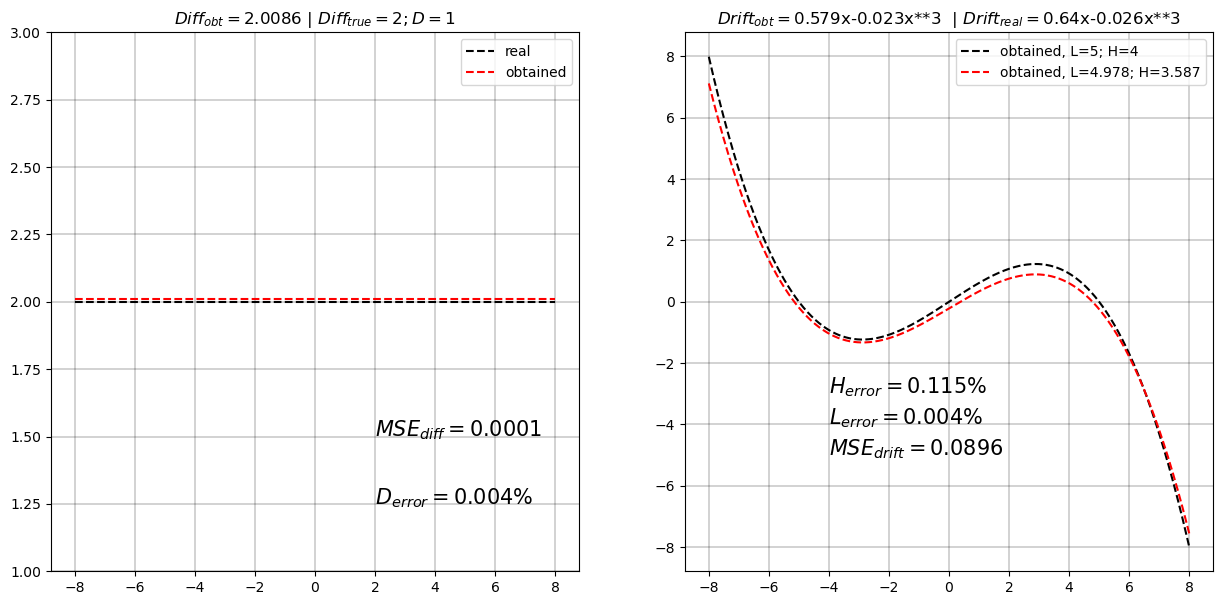

In [8]:
#recreate diffusion and drift equation using obtained coefficients from BISDE
test_pos_dw = np.linspace(-8,8,1000)
difussion_obtained_dw = plotting_results(test_pos_dw, sol_di_dw)
drift_obtained_dw = plotting_results(test_pos_dw, sol_dr_dw)
difussion_obtained_dw = np.sum(difussion_obtained_dw, axis =1 )
drift_obtained_dw= np.sum(drift_obtained_dw, axis =1 )

#set real diffusion and drift equation for later comparison
difussion_real_dw = plotting_results(test_pos_dw, [2,0,0])
drift_real_dw = plotting_results(test_pos_dw,[0,C1,0,C2])
difussion_real_dw = np.sum(difussion_real_dw, axis =1 )
drift_real_dw= np.sum(drift_real_dw, axis =1 )

#Compute MSE for drift and diffusion
drift_mse_dw = (1/len(drift_real_dw))*(np.sum((drift_real_dw-drift_obtained_dw)**2))
difussion_mse_dw = (1/len(difussion_real_dw))*(np.sum((difussion_real_dw-difussion_obtained_dw)**2))

#plot results
fig, axis = plt.subplots(1, 2, figsize =(15,7))
axis[0].plot(test_pos_dw, difussion_real_dw, label = "real", color ="k", linestyle="dashed")
axis[0].plot(test_pos_dw, difussion_obtained_dw,  label = "obtained", color ="r", linestyle="dashed")
axis[0].set_title(r"$Diff_{obt}=$"+str(round(sol_di_dw[0],4))+" | " + r"$Diff_{true}=$"+"2" +r"$ ; D=1$")
axis[0].set_ylim(1, 3)
axis[0].grid(color='k', linestyle='-', linewidth=0.25)
axis[0].annotate(r"$D_{error}=$" + str(round(error_Diff,3))+"%", xy = (2 , 1.25), size = 15)
axis[0].annotate(r"$MSE_{diff}=$" + str(round(difussion_mse_dw,4)), xy = (2 , 1.5), size = 15)
axis[0].legend()

axis[1].plot(test_pos_dw, drift_real_dw, label = "obtained, L={}; H={}".format(L, H), color = "k", linestyle="dashed")
axis[1].plot(test_pos_dw, drift_obtained_dw , label = "obtained, L={}; H={}".format(L_obt, H_obt) , color ="r", linestyle="dashed")
axis[1].set_title(r"$Drift_{obt}=$"+str(round(sol_dr_dw[1],3))+"x"+str(round(sol_dr_dw[3],3))+"x**3 " +" | " + 
                  r"$Drift_{real}=$"+str(round(C1,3))+"x"+str(round(C2,3))+"x**3")
axis[1].grid(color='k', linestyle='-', linewidth=0.25)
axis[1].annotate(r"$L_{error}=$" + str(round(error_L,3))+"%", xy = (-4 , -4),size =15)
axis[1].annotate(r"$H_{error}=$" + str(round(error_H,3))+"%", xy = (-4 , -3), size = 15)
axis[1].annotate(r"$MSE_{drift}=$" + str(round(drift_mse_dw,4)), xy = (-4 , -5), size = 15)

axis[1].legend()



# 2. HARMONIC POTENTIAL

In [9]:
# plot functions
def harmonic_potential(x,k):
    return (k*x**2)/2
def harmonic_force(x,k):
    return -k*x

#Set initial conditions
number_samples = 100000                                  #total number of iterations
time_step = 0.04                                         #time step for euler differentation
x_stable = 0                                             #initial position
k = 3                                                    #distance from the center to the minimum
gamma = 1                                                #frition coefficient


#Compute gaussian noise, time interval and trayectories
gaussian_noise = np.random.normal(size = number_samples)*np.sqrt(time_step)
trayectories_ha, time_values_ha = trayectories(x_stable, time_step, gaussian_noise, number_samples, 1, "harmonic_oscillator", k=k, gamma = gamma)

#generate library of functions for regression
lib_ha = library(trayectories_ha[:-1], 10)                    #Use polynomials up to order 20th for library
lib_ha = lib_ha.T

#generate expected value
Edr_ha = output_vectors_dr(trayectories_ha, time_step)          #Compute expectation value
Edr_ha = Edr_ha.reshape(len(Edr_ha), 1) 

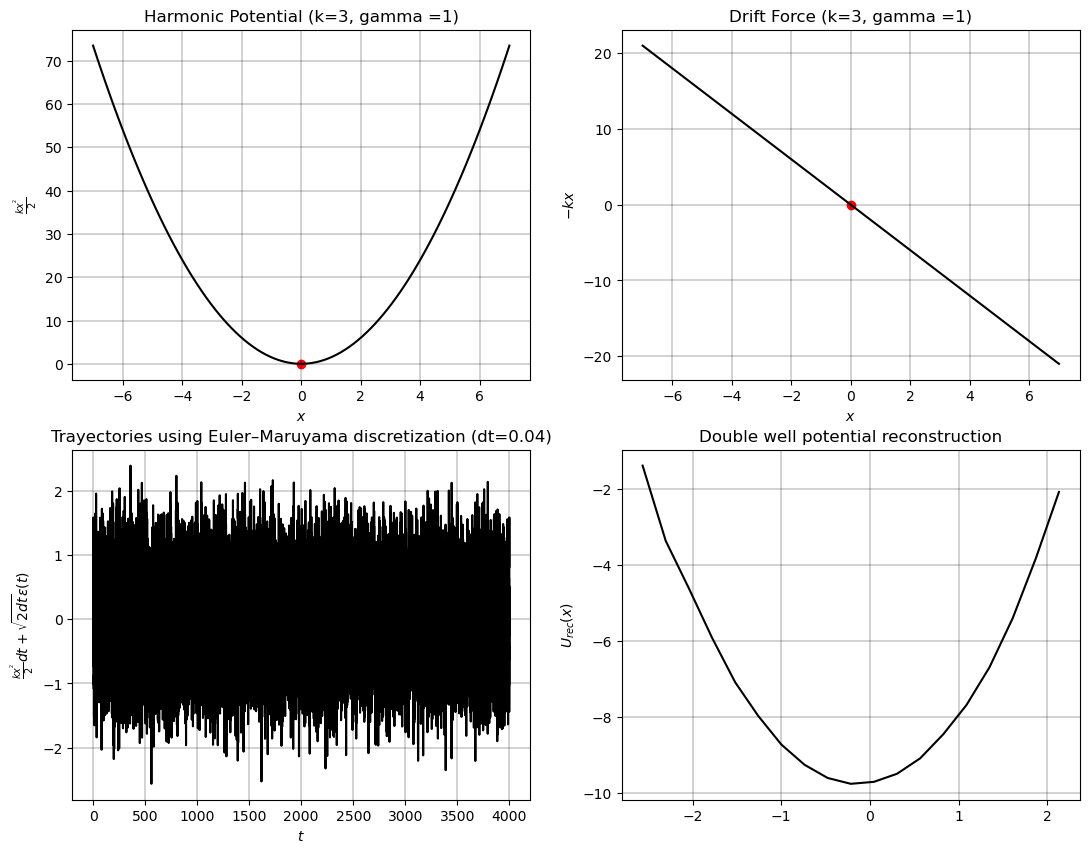

In [9]:
x_pot = np.linspace(-7,7,100)
#store histogram values
hist_values_ha = plt.hist(trayectories_ha, bins="doane")
hist_x_ha, hist_y_ha = hist_values_ha[0], hist_values_ha[1]
plt.close()

#Plottings
fig, axis = plt.subplots(2,2, figsize=(13,10))
axis[0,0].plot(x_pot, harmonic_potential(x_pot,k), color = "k") #pOtential has two minimums at L = -4, L = 4 (equilibrium points)
axis[0,0].scatter(x_stable, harmonic_potential(x_stable,k) , c = "r") 
axis[0,0].set_title("Harmonic Potential (k={}, gamma ={})".format(k,gamma))
axis[0,0].set_ylabel(r"$\frac{kx^{^{2}}}{2}$")
axis[0,0].set_xlabel(r"$x$")
axis[0,0].grid(color='k', linestyle='-', linewidth=0.25)

axis[0,1].plot(x_pot, harmonic_force(x_pot,k), color = "k") #pOtential has two minimums at L = -4, L = 4 (equilibrium points)
axis[0,1].scatter(x_stable, harmonic_force(x_stable,k) , c = "r") 
axis[0,1].set_title("Drift Force (k={}, gamma ={})".format(k,gamma))
axis[0,1].set_ylabel(r"$-kx$")
axis[0,1].set_xlabel(r"$x$")
axis[0,1].grid(color='k', linestyle='-', linewidth=0.25)

axis[1,0].plot(time_values_ha, trayectories_ha, color ="k")
axis[1,0].set_title("Trayectories using Euler–Maruyama discretization (dt={})".format(time_step))
axis[1,0].set_ylabel(r"$\frac{kx^{^{2}}}{2}dt + \sqrt{2dt}\varepsilon (t)$")
axis[1,0].set_xlabel(r"$t$")
axis[1,0].grid(color='k', linestyle='-', linewidth=0.25)

axis[1,1].plot(hist_y_ha[:-1],-np.log(hist_x_ha), color = "k")
axis[1,1].set_title("Double well potential reconstruction")
axis[1,1].set_ylabel(r"$U_{rec}(x)$")
axis[1,1].grid(color='k', linestyle='-', linewidth=0.25)

In [10]:
#Compute drift and reject values below the threshold
sol_dr_ha =  msbl_pythonic(lib_ha, Edr_ha, 700)
threshold = 0.05                                                      
sol_dr_ha[abs(sol_dr_ha) < threshold] =0

#Compute difussion using drift and reject values below the threshold
Edi_ha = output_vectors_di(trayectories_ha, time_step, lib_ha, sol_dr_ha)
Edi_ha= Edi_ha.reshape(len(Edi_ha),1)
sol_di_ha=  msbl_pythonic(lib_ha, Edi_ha, 700)
sol_di_ha[abs(sol_di_ha) < threshold] = 0

In [11]:
#Compute L and H from results
k_obt = sol_dr_ha[1]
D_ob = sol_di_ha[0]

#Compute error
error_k = abs(k-abs(k_obt))/abs(k_obt)
error_Diff=abs(2-D_ob)/D_ob

print("The error for computing k is: {}".format(error_k*100), "and the error for computing Diff is: {}".format(error_Diff*100))

The error for computing k is: 0.3587557264985055 and the error for computing Diff is: 0.22904770996033347


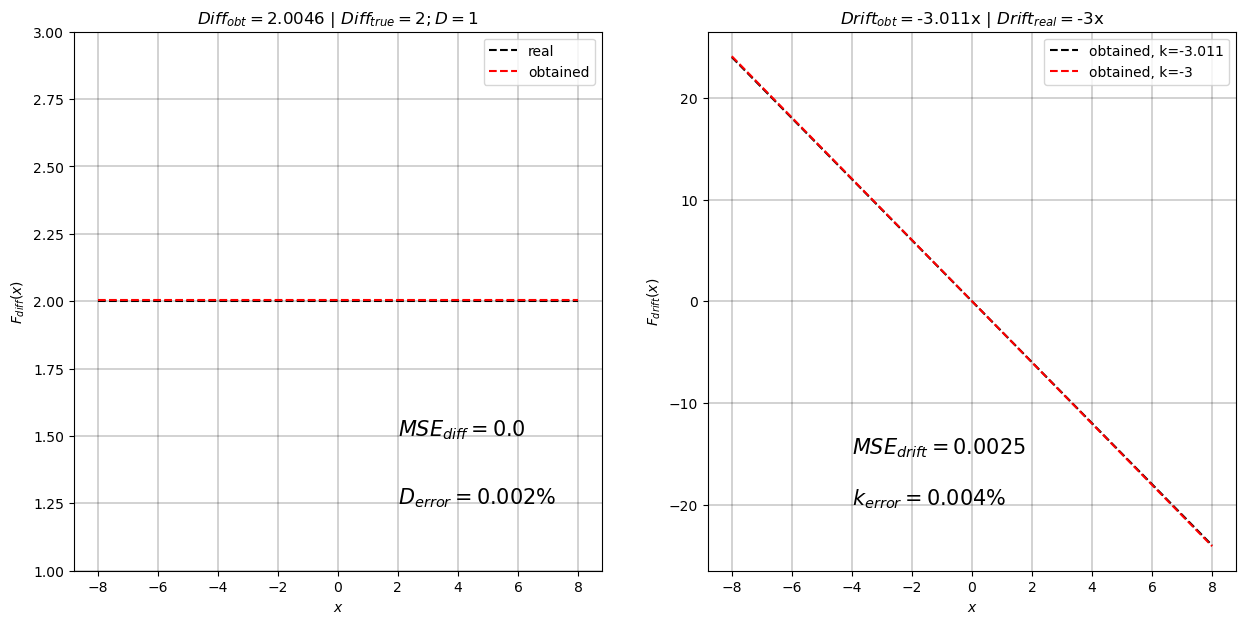

In [12]:
#recreate diffusion and drift equation using obtained coefficients from BISDE
test_pos_ha = np.linspace(-8,8,1000)
difussion_obtained_ha = plotting_results(test_pos_ha, sol_di_ha)
drift_obtained_ha = plotting_results(test_pos_ha, sol_dr_ha)
difussion_obtained_ha = np.sum(difussion_obtained_ha, axis =1 )
drift_obtained_ha= np.sum(drift_obtained_ha, axis =1 )

#set real diffusion and drift equation for later comparison
difussion_real_ha = plotting_results(test_pos_ha, [2,0,0])
drift_real_ha = plotting_results(test_pos_ha,[0,-k/gamma])
difussion_real_ha = np.sum(difussion_real_ha, axis =1 )
drift_real_ha= np.sum(drift_real_ha, axis =1 )

#Compute MSE for drift and diffusion
drift_mse_ha = (1/len(drift_real_ha))*(np.sum((drift_real_ha-drift_obtained_ha)**2))
difussion_mse_ha = (1/len(difussion_real_ha))*(np.sum((difussion_real_ha-difussion_obtained_ha)**2))

#plot results
fig, axis = plt.subplots(1, 2, figsize =(15,7))
axis[0].plot(test_pos_ha, difussion_real_ha, label = "real", color ="k", linestyle="dashed")
axis[0].plot(test_pos_ha, difussion_obtained_ha,  label = "obtained", color ="r", linestyle="dashed")
axis[0].set_title(r"$Diff_{obt}=$"+str(round(sol_di_ha[0],4))+" | " + r"$Diff_{true}=$"+"2" +r"$ ; D=1$")
axis[0].set_ylim(1, 3)
axis[0].grid(color='k', linestyle='-', linewidth=0.25)
axis[0].annotate(r"$D_{error}=$" + str(round(error_Diff,3))+"%", xy = (2 , 1.25), size = 15)
axis[0].annotate(r"$MSE_{diff}=$" + str(round(difussion_mse_ha,4)), xy = (2 , 1.5), size = 15)
axis[0].set_xlabel(r"$x$")
axis[0].set_ylabel(r"$F_{diff}(x)$")

axis[0].legend()

axis[1].plot(test_pos_ha, drift_real_ha, label = "obtained, k={}".format(round(k_obt, 3)), color = "k", linestyle="dashed")
axis[1].plot(test_pos_ha, drift_obtained_ha , label = "obtained, k={}".format(-k) , color ="r", linestyle="dashed")
axis[1].set_title(r"$Drift_{obt}=$"+str(round(sol_dr_ha[1],3))+"x" +" | " + 
                  r"$Drift_{real}=$"+str(round(-k,3))+"x")
axis[1].grid(color='k', linestyle='-', linewidth=0.25)
axis[1].annotate(r"$k_{error}=$" + str(round(error_k,3))+"%", xy = (-4 , -20),size =15)
axis[1].annotate(r"$MSE_{drift}=$" + str(round(drift_mse_ha,4)), xy = (-4 , -15), size = 15)
axis[1].set_xlabel(r"$x$")
axis[1].set_ylabel(r"$F_{drift}(x)$")
axis[1].legend()



# 3) 2D Double potential well

In [198]:
#Set initial conditions
number_samples = 80*10**3                            #total number of iterations
time_step = 0.02                                     #time step for euler differentation
xy_init = [1,1]                                      #initial position


#Compute gaussian noise, time interval and trayectories
gaussian_noise_2d = np.random.normal(size = number_samples)*np.sqrt(time_step), np.random.normal(size = number_samples)*np.sqrt(time_step)
trayectories_x_2d_3, trayectories_y_2d_3, time_values_2d_3 = trayectories_2d(xy_init, time_step, gaussian_noise_2d, number_samples, "example_3")

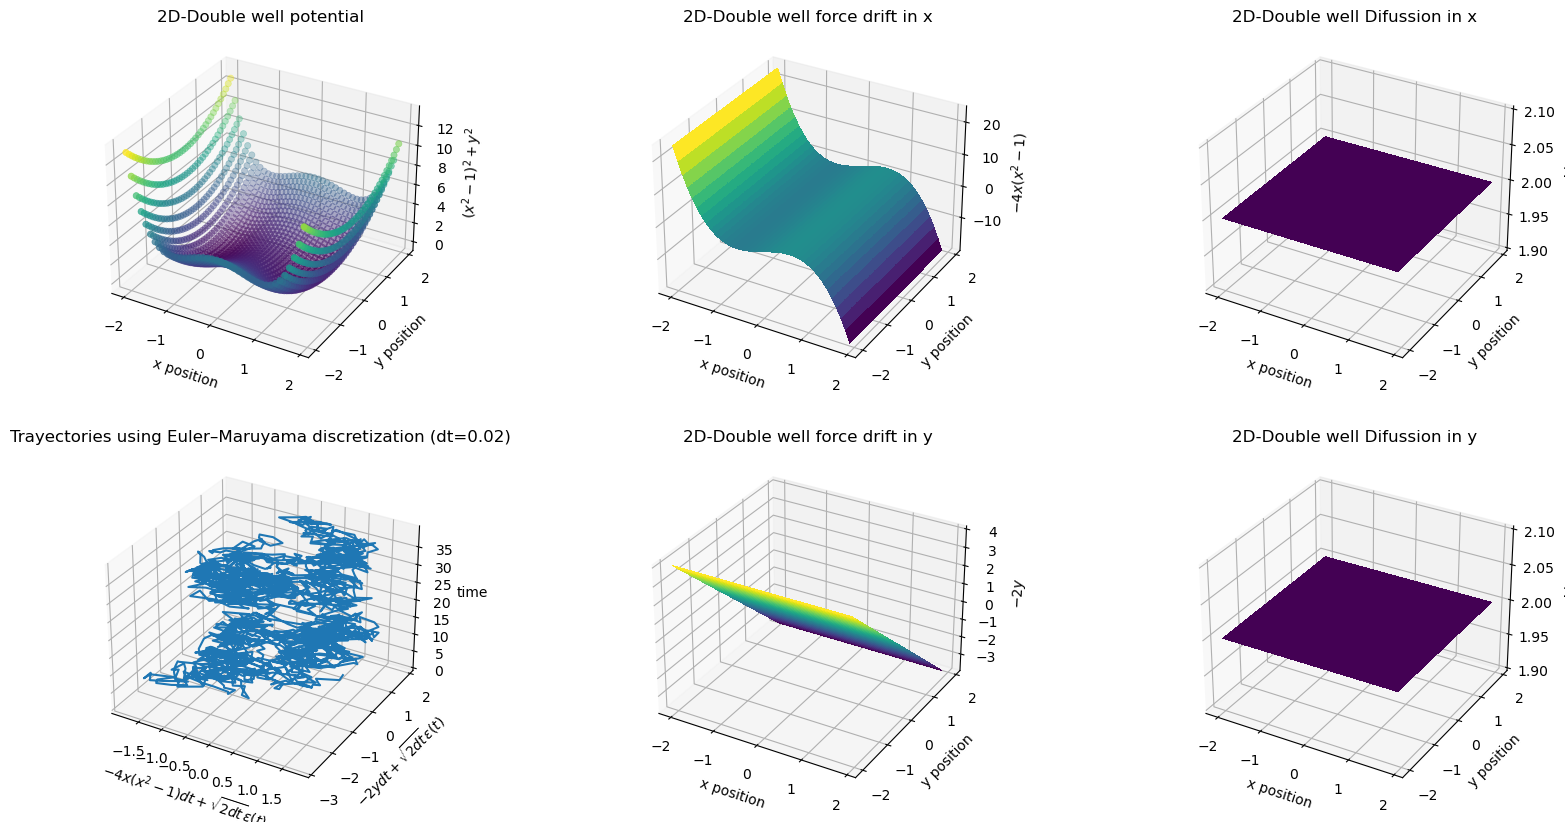

In [199]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(2,3, subplot_kw={"projection": "3d"}, figsize=(20,10))

# Make data.
x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(x, y)
D0 =2*np.ones((len(X), len(Y)))

ax[0][0].scatter(X,Y, pot_3(X,Y), c =pot_3(X,Y),   cmap='viridis', linewidth=0.5)
ax[0][0].set_title("2D-Double well potential")
ax[0][0].set_xlabel("x position")
ax[0][0].set_ylabel("y position")
ax[0][0].set_zlabel(r"$(x^{2}-1)^{2} + y^{2}$")

#plot drift for x
ax[0][1].plot_surface(X, Y, drift3_x(X,Y), cmap='viridis',linewidth=0, antialiased=False)
ax[0][1].set_title("2D-Double well force drift in x")
ax[0][1].set_xlabel("x position")
ax[0][1].set_ylabel("y position")
ax[0][1].set_zlabel(r"$-4x(x^{2}-1)$")

#plot drift for y
ax[1][1].plot_surface(X, Y, drift3_y(X,Y), cmap='viridis', linewidth=0, antialiased=False)
ax[1][1].set_title("2D-Double well force drift in y")
ax[1][1].set_xlabel("x position")
ax[1][1].set_ylabel("y position")
ax[1][1].set_zlabel(r"$-2y$")


#plot diff for x
ax[0][2].plot_surface(X, Y,D0, cmap='viridis', linewidth=0, antialiased=False)
ax[0][2].set_title("2D-Double well Difussion in x")
ax[0][2].set_xlabel("x position")
ax[0][2].set_ylabel("y position")
ax[0][2].set_zlabel(r"$2$")

#plot diff for y
ax[1][2].plot_surface(X, Y,D0, cmap='viridis', linewidth=0, antialiased=False)
ax[1][2].set_title("2D-Double well Difussion in y")
ax[1][2].set_xlabel("x position")
ax[1][2].set_ylabel("y position")
ax[1][2].set_zlabel(r"$2$")


#plot trayectories
ax[1][0].plot3D(trayectories_x_2d_3[:2000], trayectories_y_2d_3[:2000], time_values_2d_3[:2000])
ax[1][0].set_title("Trayectories using Euler–Maruyama discretization (dt={})".format(time_step))
ax[1][0].set_xlabel(r"$-4x(x^{2}-1)dt +\sqrt{2dt}\epsilon (t)$")
ax[1][0].set_ylabel(r"$-2ydt +\sqrt{2dt}\epsilon (t)$")
ax[1][0].set_zlabel("time")


plt.show()

In [27]:
#generate library of functions for regression
lib_2d, indexes_2d = library2d(trayectories_x_2d_3[:-1],trayectories_y_2d_3[:-1], 4)                    
lib_2d = lib_2d.T
label=["1", "y", "y**2", "y**3", "x", "xy", "xy**2", "xy**3", "x**2", "x**2y",
       "x**2y**2", "x**2y**3", "x**3", "x**3y", "x**3y**2", "x**3y**3"]

#generate expectation values
Edr_2dx = output_vectors_dr(trayectories_x_2d_3, time_step)          
Edr_2dx = Edr_2dx.reshape(len(Edr_2dx), 1) 
Edr_2dy = output_vectors_dr(trayectories_y_2d_3, time_step)          
Edr_2dy = Edr_2dy.reshape(len(Edr_2dy), 1) 


In [28]:

#Compute drift and reject values below the threshold
sol_dr_2dx =  msbl_pythonic(lib_2d, Edr_2dx, 700)
threshold = 0.3                                                      
sol_dr_2dx[abs(sol_dr_2dx) < threshold] =0

#Compute difussion using drift and reject values below the threshold
Edi_2dx = output_vectors_di(trayectories_x_2d_3, time_step, lib_2d, sol_dr_2dx)
Edi_2dx= Edi_2dx.reshape(len(Edi_2dx),1)
sol_di_2dx=  msbl_pythonic(lib_2d, Edi_2dx, 1000)
sol_di_2dx[abs(sol_di_2dx) < threshold] = 0

#Compute drift and reject values below the threshold
sol_dr_2dy =  msbl_pythonic(lib_2d, Edr_2dy, 1000)
threshold = 0.1                                                     
sol_dr_2dy[abs(sol_dr_2dy) < threshold] =0

#Compute difussion using drift and reject values below the threshold
Edi_2dy = output_vectors_di(trayectories_y_2d_3, time_step, lib_2d, sol_dr_2dy)
Edi_2dy= Edi_2dy.reshape(len(Edi_2dy),1)
sol_di_2dy=  msbl_pythonic(lib_2d, Edi_2dy, 1000)
sol_di_2dy[abs(sol_di_2dy) < threshold] = 0

In [120]:
di_error_2dx = porcentage_error(sol_di_2dx[0],2.0)
di_error_2dy = porcentage_error(sol_di_2dy[0],2.0)
dr1_error_2dx = porcentage_error(sol_dr_2dx[4],4.0)
dr2_error_2dx = porcentage_error(sol_dr_2dx[12],-4.0)
dr1_error_2dy = porcentage_error(sol_dr_2dy[1],-2.0)


In [233]:
print("The error for computing the coefficients of the drift in x are: A1(x**3)={}, A2(x)={}".format(dr1_error_2dx, dr2_error_2dx))
print("The error for computing the coefficients of the drift in y are: C1(y)={}".format(dr1_error_2dy))
print("The error for computing the coefficients of the diffusion in x is: B1(c)={}".format(di_error_2dx))
print("The error for computing the coefficients of the diffusion in y is: D1(c)={}".format(di_error_2dy))

The error for computing the coefficients of the drift in x are: A1(x**3)=2.3337790216468646, A2(x)=2.511466984951749
The error for computing the coefficients of the drift in y are: C1(y)=3.4733641336602394
The error for computing the coefficients of the diffusion in x is: B1(c)=0.6324071062479009
The error for computing the coefficients of the diffusion in y is: D1(c)=0.2372618242992841


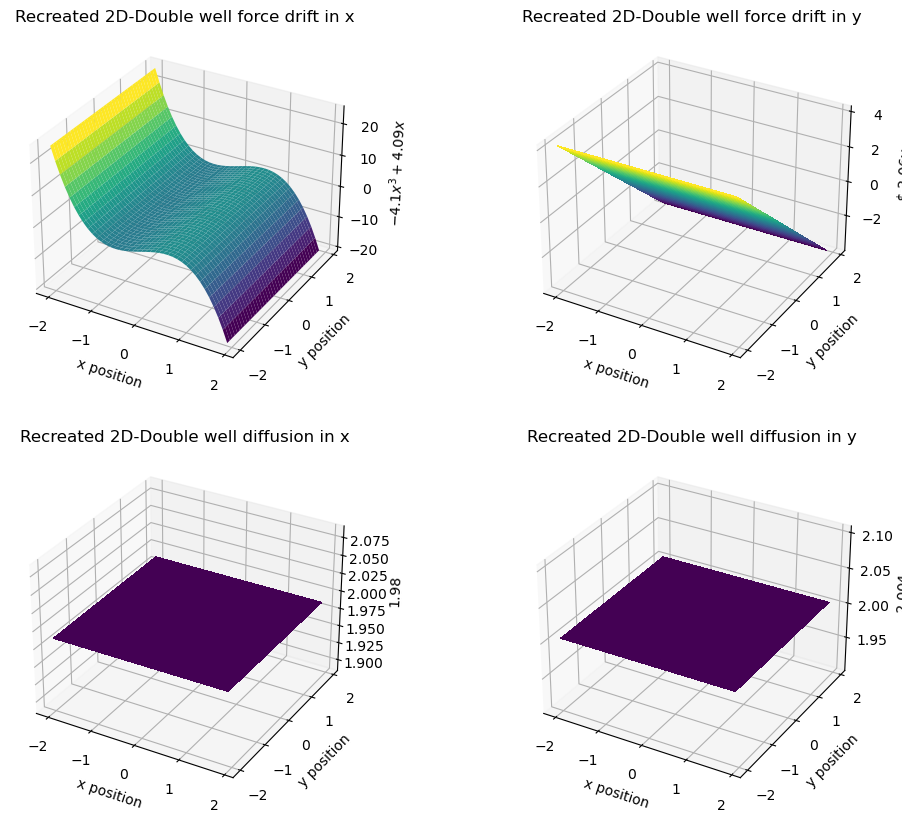

In [147]:
#recreate functions drift and diffusion
def drift3_x_r(x,y,c0,c1):
    """"double well potential"""
    return c0*x**3 + c1*x

def drift3_y_r(x,y,c0):
    """"double well potential"""
    return c0*y

def diff3_x_r(x,y,c0):
    """"double well potential"""
    return c0 

def diff3_y_r(x,y,c0):
    """"double well potential"""
    return c0 

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(2,2, subplot_kw={"projection": "3d"}, figsize=(12,10))

# Make data.
x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(x, y)
Dx0 =sol_di_2dx[0]*np.ones((len(X), len(Y)))
Dy0 =sol_di_2dy[0]*np.ones((len(X), len(Y)))

ax[0][0].plot_surface(X,Y, drift3_x_r(X,Y, sol_dr_2dx[12], sol_dr_2dx[4]),   cmap='viridis', linewidth=0.5)
ax[0][0].set_title("Recreated 2D-Double well force drift in x")
ax[0][0].set_xlabel("x position")
ax[0][0].set_ylabel("y position")
ax[0][0].set_zlabel(r"$-4.1x^{3}+4.09x$")

#plot drift for x
ax[0][1].plot_surface(X, Y, drift3_y_r(X,Y, sol_dr_2dy[1]), cmap='viridis',linewidth=0, antialiased=False)
ax[0][1].set_title("Recreated 2D-Double well force drift in y")
ax[0][1].set_xlabel("x position")
ax[0][1].set_ylabel("y position")
ax[0][1].set_zlabel(r"$-2.06y")

#plot drift for y
ax[1][0].plot_surface(X, Y, sol_di_2dx[0]*np.ones((len(X),len(Y))), cmap='viridis', linewidth=0, antialiased=False)
ax[1][0].set_title("Recreated 2D-Double well diffusion in x")
ax[1][0].set_xlabel("x position")
ax[1][0].set_ylabel("y position")
ax[1][0].set_zlabel(r"$1.98$")

#plot drift for y
ax[1][1].plot_surface(X, Y, sol_di_2dy[0]*np.ones((len(X), len(Y))), cmap='viridis', linewidth=0, antialiased=False)
ax[1][1].set_title("Recreated 2D-Double well diffusion in y")
ax[1][1].set_xlabel("x position")
ax[1][1].set_ylabel("y position")
ax[1][1].set_zlabel(r"$2.004$")

plt.show()

# 4 2D Harmonic Oscillator

In [214]:
#Set initial conditions
number_samples = 80*10**3                            #total number of iterations
time_step = 0.025                                     #time step for euler differentation
xy_init = [0,0]                                      #initial position
k0 = 3
k1 = 5

#Compute gaussian noise, time interval and trayectories
gaussian_noise_2d = np.random.normal(size = number_samples)*np.sqrt(time_step), np.random.normal(size = number_samples)*np.sqrt(time_step)
trayectories_x_2d_ha, trayectories_y_2d_ha, time_values_2d_ha = trayectories_2d(xy_init, time_step, gaussian_noise_2d, number_samples, "example_2", a1 = k0, a2 = k1)

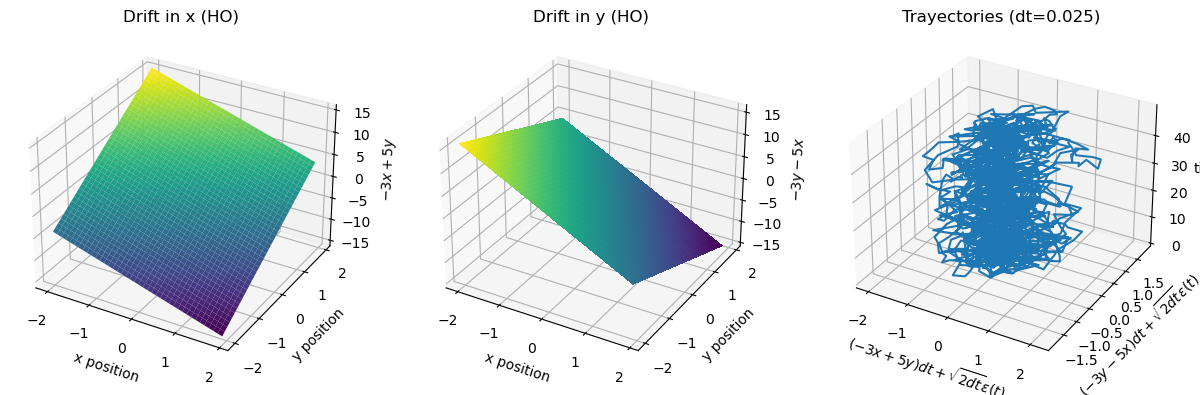

In [238]:
fig, ax = plt.subplots(1,3, subplot_kw={"projection": "3d"}, figsize=(15,10))

# Make data.
x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(x, y)

ax[0].plot_surface(X,Y, drift2_x(X,Y,k0,k1),   cmap='viridis', linewidth=0.5)
ax[0].set_title("Drift in x (HO)")
ax[0].set_xlabel("x position")
ax[0].set_ylabel("y position")
ax[0].set_zlabel(r"$-3x+5y$")

#plot drift for x
ax[1].plot_surface(X, Y, drift2_y(X,Y,k0,k1), cmap='viridis',linewidth=0, antialiased=False)
ax[1].set_title("Drift in y (HO)")
ax[1].set_xlabel("x position")
ax[1].set_ylabel("y position")
ax[1].set_zlabel(r"$-3y-5x$")


#plot trayectories
ax[2].plot3D(trayectories_x_2d_ha[:2000], trayectories_y_2d_ha[:2000], time_values_2d_ha[:2000])
ax[2].set_title("Trayectories (dt={})".format(time_step))
ax[2].set_xlabel(r"$(-3x+5y)dt +\sqrt{2dt}\epsilon (t)$")
ax[2].set_ylabel(r"$(-3y-5x)dt +\sqrt{2dt}\epsilon (t)$")
ax[2].set_zlabel("time")

plt.show()

In [ ]:
def msbl_running(xpos, ypos, delta_t, tsh, iterations, library_order ):
    #compute library for generated trayectories
    lib_2d, indexes_2d = library2d(xpos[:-1],ypos[:-1], library_order)                    
    lib_2d = lib_2d.T
    Edr_2dx = output_vectors_dr(xpos, delta_t)          
    Edr_2dx = Edr_2dx.reshape(len(Edr_2dx), 1) 
    Edr_2dy = output_vectors_dr(ypos, delta_t)          
    Edr_2dy = Edr_2dy.reshape(len(Edr_2dy), 1) 

    #Compute drift and reject values below the threshold
    solution_dr_2dx =  msbl_pythonic(lib_2d, Edr_2dx, iterations)                                                   
    solution_dr_2dx[abs(solution_dr_2dx) < tsh] =0

    #Compute difussion using drift and reject values below the threshold
    Edi_2dx = output_vectors_di(xpos, delta_t, lib_2d, solution_dr_2dx)
    Edi_2dx= Edi_2dx.reshape(len(Edi_2dx),1)
    solution_di_2dx=  msbl_pythonic(lib_2d, Edi_2dx, iterations)
    solution_di_2dx[abs(solution_di_2dx) < tsh] = 0

    #Compute drift and reject values below the threshold
    solution_dr_2dy =  msbl_pythonic(lib_2d, Edr_2dy, iterations)                                                 
    solution_dr_2dy[abs(solution_dr_2dy) < tsh] =0

    #Compute difussion using drift and reject values below the threshold
    Edi_2dy = output_vectors_di(ypos, delta_t, lib_2d, sol_dr_2dy_ha)
    Edi_2dy_ha= Edi_2dy.reshape(len(Edi_2dy_ha),1)

    sol_di_2dy_ha=  msbl_pythonic(lib_2d_ha, Edi_2dy_ha, iterations)
    sol_di_2dy_ha[abs(sol_di_2dy_ha) < tsh] = 0

return solution_dr_2dx, solution_dr_2dy, solution_di_2dx, solution_di_2dy, 

In [241]:
def msbl_running(positions, delta_t, tsh, iterations, library_order ):
    lib_2d, indexes_2d = library2d(positions[0][:-1], positions[1][:-1], library_order)                    
    lib_2d = lib_2d.T
    inferred_terms = []
    for i in range(0,len(positions)):
        #compute drift
        Edr = output_vectors_dr(positions[i], delta_t)
        Edr = Edr.reshape(len(Edr), 1) 
        solution_dr =  msbl_pythonic(lib_2d, Edr, iterations)    
        solution_dr[abs(solution_dr) < tsh] =0
        #compute difussion
        Edi = output_vectors_di(positions[0], delta_t, lib_2d, solution_dr)
        Edi= Edi.reshape(len(Edi),1)
        solution_di = msbl_pythonic(lib_2d, Edi_2dx, iterations)
        solution_di[abs(solution_di) < tsh] = 0
        inferred_terms.append(solution_dr)
        inferred_terms.append(solution_di)
    
    return inferred_terms

valor = msbl_running([trayectories_x_2d_ha, trayectories_y_2d_ha], time_step, 0.1, 1000, 2 )

In [221]:
#generate library of functions for regression
lib_2d_ha, indexes_2d_ha = library2d(trayectories_x_2d_ha[:-1],trayectories_y_2d_ha[:-1], 2)                    
lib_2d_ha = lib_2d_ha.T


#generate expectation values
Edr_2dx_ha = output_vectors_dr(trayectories_x_2d_ha, time_step)          
Edr_2dx_ha = Edr_2dx_ha.reshape(len(Edr_2dx_ha), 1) 
Edr_2dy_ha = output_vectors_dr(trayectories_y_2d_ha, time_step)          
Edr_2dy_ha = Edr_2dy_ha.reshape(len(Edr_2dy_ha), 1) 

In [222]:

#Compute drift and reject values below the threshold
sol_dr_2dx_ha =  msbl_pythonic(lib_2d_ha, Edr_2dx_ha, 700)
threshold = 0.3                                                      
sol_dr_2dx_ha[abs(sol_dr_2dx_ha) < threshold] =0

#Compute difussion using drift and reject values below the threshold
Edi_2dx_ha = output_vectors_di(trayectories_x_2d_ha, time_step, lib_2d_ha, sol_dr_2dx_ha)
Edi_2dx_ha= Edi_2dx_ha.reshape(len(Edi_2dx_ha),1)
sol_di_2dx_ha=  msbl_pythonic(lib_2d_ha, Edi_2dx_ha, 1000)
sol_di_2dx_ha[abs(sol_di_2dx_ha) < threshold] = 0

#Compute drift and reject values below the threshold
sol_dr_2dy_ha =  msbl_pythonic(lib_2d_ha, Edr_2dy_ha, 1000)
threshold = 0.1                                                     
sol_dr_2dy_ha[abs(sol_dr_2dy_ha) < threshold] =0

#Compute difussion using drift and reject values below the threshold
Edi_2dy_ha = output_vectors_di(trayectories_y_2d_ha, time_step, lib_2d_ha, sol_dr_2dy_ha)
Edi_2dy_ha= Edi_2dy.reshape(len(Edi_2dy_ha),1)
sol_di_2dy_ha=  msbl_pythonic(lib_2d_ha, Edi_2dy_ha, 1000)
sol_di_2dy_ha[abs(sol_di_2dy_ha) < threshold] = 0

In [226]:
sol_dr_2dx_ha

array([ 0.        ,  5.02736419, -3.04343136,  0.        ])

# 4 Lorentz 

In [162]:
#Set initial conditions
number_samples = 25*10**3                            #total number of iterations
time_step = 0.02                                     #time step for euler differentation
xyz_init = [-8,8,27]                                      #initial position


#Compute gaussian noise, time interval and trayectories
gaussian_noise_2d = np.random.normal(size = number_samples)*np.sqrt(time_step), np.random.normal(size = number_samples)*np.sqrt(time_step), np.random.normal(size = number_samples)*np.sqrt(time_step)
trayectories_x_3d, trayectories_y_3d, trayectories_z_3d, time_values_3d = trayectories_3d(xyz_init, time_step, gaussian_noise_2d, number_samples, "lorentz")

Text(0.5, 0, 'z position')

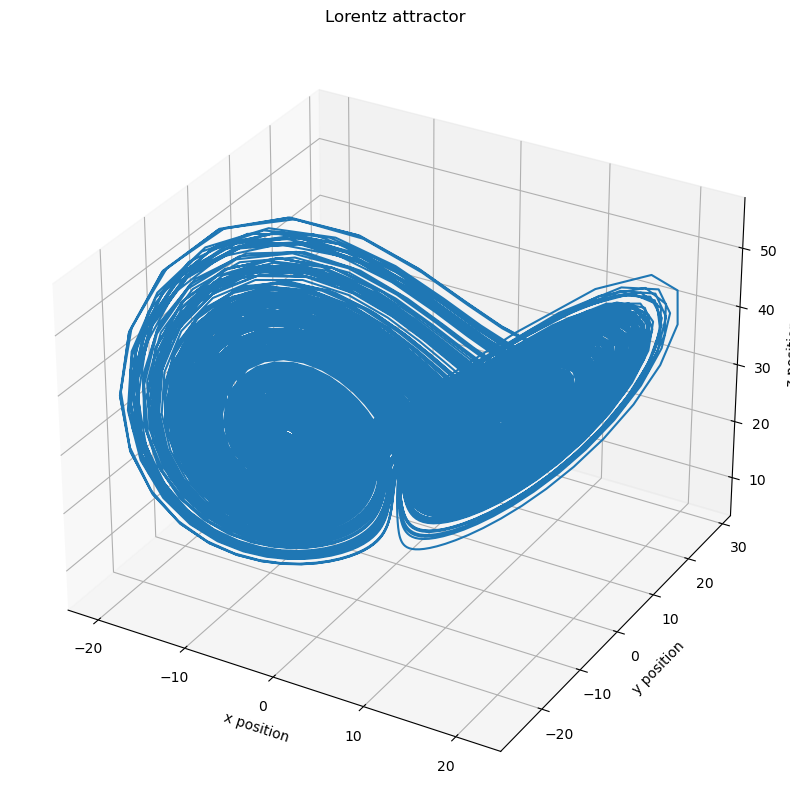

In [196]:
fig, ax = plt.subplots(1,1, subplot_kw={"projection": "3d"}, figsize=(20,10))

# Make data.


ax.plot3D(trayectories_x_3d, trayectories_y_3d, trayectories_z_3d)
ax.set_title("Lorentz attractor")
ax.set_xlabel("x position")
ax.set_ylabel("y position")
ax.set_zlabel("z position")
#ax.view_init(-140, 60)

In [177]:
#generate library of functions for regression
lib_3d, indexes_3d = library3d(trayectories_x_3d[:-1],trayectories_y_3d[:-1],trayectories_z_3d[:-1], 2)                    
lib_3d = lib_3d.T
label=["1", "z", "y", "xy", "x", "xz", "xy", "xyz"]

#generate expectation values
Edr_3dx = output_vectors_dr(trayectories_x_3d, time_step)          
Edr_3dx = Edr_3dx.reshape(len(Edr_3dx), 1) 
Edr_3dy = output_vectors_dr(trayectories_y_3d, time_step)          
Edr_3dy = Edr_3dy.reshape(len(Edr_3dy), 1) 
Edr_3dz = output_vectors_dr(trayectories_z_3d, time_step)          
Edr_3dz = Edr_3dz.reshape(len(Edr_3dz), 1) 


In [188]:
#Compute drift and reject values below the threshold
sol_dr_3dx =  msbl_pythonic(lib_3d, Edr_3dx, 1000)
threshold = 0.3                                                      
sol_dr_3dx[abs(sol_dr_3dx) < threshold] =0

#Compute drift and reject values below the threshold
sol_dr_3dy =  msbl_pythonic(lib_3d, Edr_3dy, 1000)                                                    
sol_dr_3dy[abs(sol_dr_3dy) < threshold] =0

#Compute drift and reject values below the threshold
sol_dr_3dz =  msbl_pythonic(lib_3d, Edr_3dz, 1000)                                                   
sol_dr_3dz[abs(sol_dr_3dz) < threshold] =0

In [187]:
label

['1', 'z', 'y', 'xy', 'x', 'xz', 'xy', 'xyz']

In [189]:
sol_dr_3dx

array([  0.,   0.,  10.,   0., -10.,   0.,   0.,   0.])

In [190]:
sol_dr_3dy

array([ 0.,  0., -1.,  0., 28., -1.,  0.,  0.])

In [191]:
sol_dr_3dz

array([ 0.        , -2.66666667,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ])

In [176]:
val

array([[  1.,   1.,   1.],
       [  3.,   6.,   9.],
       [  2.,   4.,   6.],
       [  6.,  24.,  54.],
       [  1.,   2.,   3.],
       [  3.,  12.,  27.],
       [  2.,   8.,  18.],
       [  6.,  48., 162.]])

In [156]:
def drift_x_3d(x, y, z):
    return -10*x + 10*y

def drift_y_3d(x, y, z):
    return 28*x -x*z - y

def drift_z_3d(x, y, z):
    return x*y -8/3*z

def trayectories_3d(pos_init, time_step, noise, iterations, type):
    pos_x = pos_init[0]
    pos_y = pos_init[1]
    pos_z = pos_init[2]
    positions_x = [pos_x]
    positions_y = [pos_y]
    positions_z = [pos_z]
    time = 0
    time_list = [time]
    noise_x = noise[0]
    noise_y = noise[1]
    noise_z = noise[2]

    for i in range(1, iterations):
        if type == "lorentz":
            update_x = drift_x_3d(pos_x, pos_y, pos_z)*time_step #+ np.sqrt(diff_x_3d(pos_x, pos_y, pos_z))*noise_x[i]
            update_y = drift_y_3d(pos_x, pos_y, pos_z)*time_step #+ np.sqrt(diff_y_3d(pos_x, pos_y, pos_z))*noise_y[i]
            update_z = drift_z_3d(pos_x, pos_y, pos_z)*time_step #+ np.sqrt(diff_y_3d(pos_x, pos_y, pos_z))*noise_y[i]


        pos_x = pos_x + update_x
        pos_y = pos_y + update_y
        pos_z = pos_z + update_z
        time = time + time_step
        positions_x.append(pos_x)
        positions_y.append(pos_y)
        positions_z.append(pos_z)
        time_list.append(time)
    
    return np.asarray(positions_x), np.asarray(positions_y), np.asarray(positions_z),  np.asarray(time_list)